# Part II - (The Influence of EmploymentStatus and Term on  Loan Status)
## by (Akpan Enwongo Boniface



## Investigation Overview


> In this investigation, I want to assess the variables that may affect the loan status and may be used to identify trends in delinquency. The focus is on the Term, EmploymentStatus and Loan Status. 



## Dataset Overview

> The dataset contains 113066 entries with 81 variables including Term, Employment Status and the Loan Status. The data points were reduced to 110809 due to inconsistencies. Loan Status will be re-grouped into Charged off, Delinquent Payments and Non Delinquent Payments and the categories in the Employment Status were  reduced to Employed,Full-time, Not employed, Self-employed, Part-time and Retired.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

prosper = pd.read_csv('prosperLoanData.csv', sep=',')
prosper.head()


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# select choice variables to focus on, then proceed with cleaning.

df = prosper[['ListingNumber', 'Term', 'LoanStatus', 'EmploymentStatus']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 4 columns):
ListingNumber       113937 non-null int64
Term                113937 non-null int64
LoanStatus          113937 non-null object
EmploymentStatus    111682 non-null object
dtypes: int64(2), object(2)
memory usage: 3.5+ MB


In [4]:
#drop duplicates
df[df.ListingNumber.duplicated() == True].count()['ListingNumber']
df.drop_duplicates(inplace=True)
df[df.ListingNumber.duplicated() == True].count()['ListingNumber']

0

In [5]:
print(df['LoanStatus'].value_counts());
print(df['EmploymentStatus'].value_counts());
print(df['Term'].value_counts());

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64
Employed         66598
Full-time        26354
Self-employed     6052
Not available     5347
Other             3742
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64
36    87224
60    24228
12     1614
Name: Term, dtype: int64


In [6]:
# make column index
df.set_index('ListingNumber', inplace=True)

In [7]:
# drop null values
df_new = df.dropna(axis = 0, how ='any')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110811 entries, 193129 to 1140093
Data columns (total 3 columns):
Term                110811 non-null int64
LoanStatus          110811 non-null object
EmploymentStatus    110811 non-null object
dtypes: int64(1), object(2)
memory usage: 3.4+ MB


In [8]:
# In the LoanStatus, we will take out the Cancelled loans. 

cancelled =  ["Cancelled"] 

df_new_1 = df_new[~df_new['LoanStatus'].isin(cancelled)]
df_clean = df_new_1.copy()
print(df_clean['LoanStatus'].value_counts())


Current                   55730
Completed                 36622
Chargedoff                11701
Defaulted                  4496
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64


In [9]:
#Change Term, EmploymentStatus and LoanStatus to categorical data.

df_clean['LoanStatus'] = df_clean['LoanStatus'].astype('category')
df_clean['Term'] = df_clean['Term'].astype('category')
df_clean['EmploymentStatus'] = df_clean['EmploymentStatus'].astype('category')

In [10]:
# set and order categories for "Term" column
df_clean["Term"] = df_clean["Term"].cat.set_categories([12, 36, 60], ordered=True)

In [11]:
# Reduce the category levels in LoanStatus by making all Defaulted and Past Dues into a single level - Past_due, and all Current and FinalPaymentInProgress into a single category - Non_delinquent.
 
mappings = {'Past Due (1-15 days)': 'Past_due', 'Past Due (31-60 days)': 'Past_due',
    'Past Due (61-90 days)': 'Past_due', 'Past Due (91-120 days)': 'Past_due',
    'Past Due (16-30 days)': 'Past_due', 'Past Due (>120 days)': 'Past_due', 'Defaulted': 'Past_due', 'Chargedoff': 'Chargeoff', 'Current': 'Non_delinquent', 'Completed': 'Completed','FinalPaymentInProgress': 'Non_delinquent'}

df_clean['LoanStatus'] = df_clean['LoanStatus'].replace(mappings)
print(df_clean.LoanStatus.value_counts())
print(df_clean.info())

Non_delinquent    55933
Completed         36622
Chargeoff         11701
Past_due           6553
Name: LoanStatus, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 110809 entries, 193129 to 1140093
Data columns (total 3 columns):
Term                110809 non-null category
LoanStatus          110809 non-null object
EmploymentStatus    110809 non-null category
dtypes: category(2), object(1)
memory usage: 1.9+ MB
None


In [12]:
df_clean.EmploymentStatus.value_counts()

Employed         66598
Full-time        26353
Self-employed     6052
Not available     5346
Other             3742
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [13]:
# Reduce the category levels in EmploymentStatus. Categorize other and Not available as Not employed.

new_map = {'Employed': 'Employed', 'Full-time': 'Full-time', 'Self-employed': 'Self-employed', 'Retired': 'Retired',
    'Part-time': 'Part-time', 'Not available': 'Not employed', 'Other': 'Not employed', 'Not employed': 'Not employed'}

df_clean['EmploymentStatus'] = df_clean['EmploymentStatus'].replace(new_map)
print(df_clean.EmploymentStatus.value_counts())
print(df_clean.info())

Employed         66598
Full-time        26353
Not employed      9923
Self-employed     6052
Part-time         1088
Retired            795
Name: EmploymentStatus, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 110809 entries, 193129 to 1140093
Data columns (total 3 columns):
Term                110809 non-null category
LoanStatus          110809 non-null object
EmploymentStatus    110809 non-null object
dtypes: category(1), object(2)
memory usage: 2.6+ MB
None


## (Loan Status Distribution)

There are now two categories assigned to Loan status in the cleaned dataframe - Chargedoff and Past Due. 

The clustered bar chart below shows the distribution of both status. The Charged Off payments are over 11,000 data points and the past due payments over 6,000 data points.

We have borrowers with more bad debt -debts that may not be recovered(Charged Off) compared to those with delinquent (past due) payments.


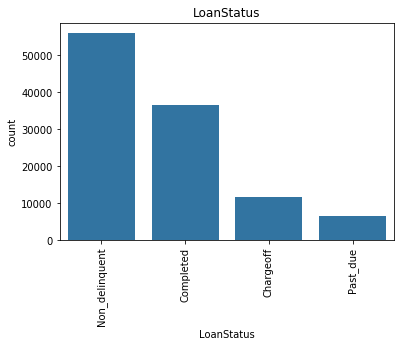

In [14]:
base_color = sb.color_palette()[0]

Loan_Status = df_clean['LoanStatus'].value_counts().index
sb.countplot(data=df_clean,x='LoanStatus',color=base_color, order=Loan_Status)
plt.title('LoanStatus')
plt.xticks(rotation=90)
plt.show()

In [15]:
# def function to plot bivariate visualizations.

def plot_clustered(dataframe, column_name, column_name_1):
    hue = column_name_1
    plt.figure(figsize = [13, 5])
    plt.xticks(rotation=90);
    plot=sb.countplot(data=dataframe, x = column_name, hue = column_name_1)
    return(plot)

## (LoanStatus Vs EmploymentStatus)
There were more non delinquent payments for the self employed and Employed  borrowers,, while there were more completed payments for the full time, Part time and Retired borrowers.  

The Part time and Retired borrowers did not have past due payments.Full time had the most completed payment, Employed had the most Non delinquent payment and the most past due payment, while full time had the most charge off loans.

Full time has the largest completed to pastdue ratio, while retired has the lowest ratio of completed payments to past due payments.

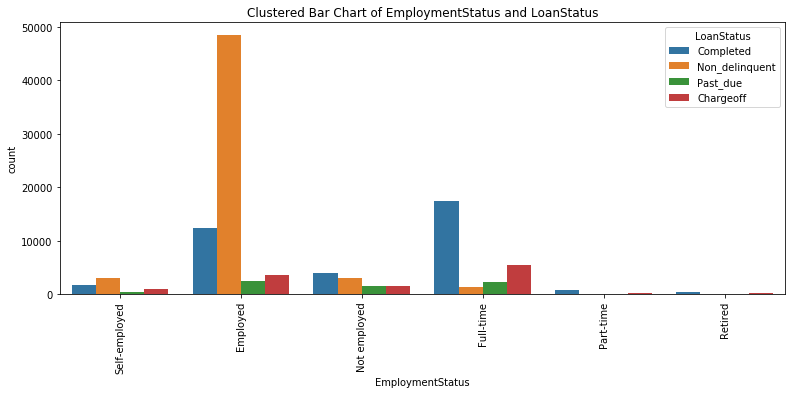

In [16]:
plot_clustered(df_clean, 'EmploymentStatus', 'LoanStatus')
plt.title('Clustered Bar Chart of EmploymentStatus and LoanStatus');

## (LoanStatus Vs Term)
The 36-month term had the highest distribution for all classes under LoanStatus, followed by the 60-month term. Only completed payments were seen under the 12-month term.

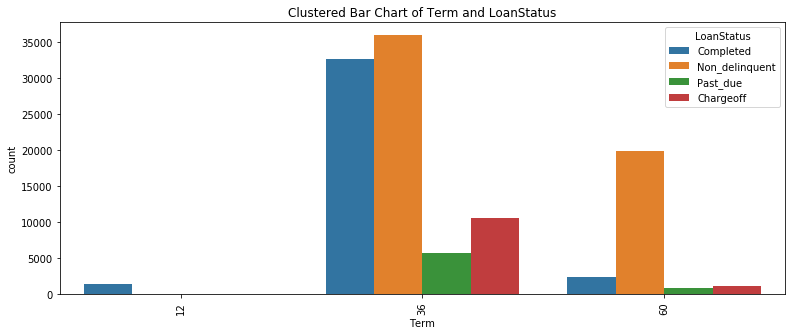

In [17]:
plot_clustered(df_clean, 'Term', 'LoanStatus')
plt.title('Clustered Bar Chart of Term and LoanStatus');

## (Term Vs EmploymentStatus)

Borrowers with the employed status had the most distribution across the three terms.  There were no retirees and part time workers at the 60-month term. The 12-month term has the least distribution of workers.


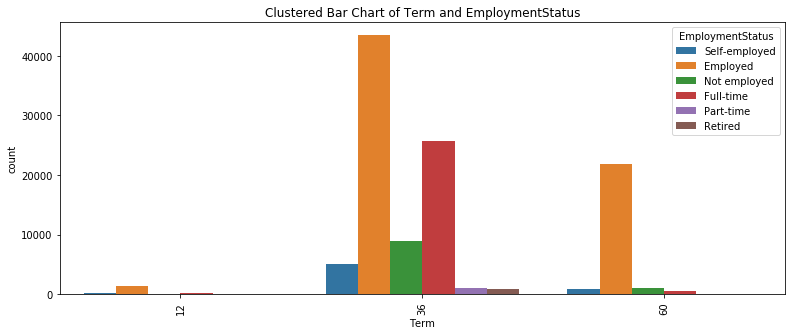

In [18]:
plot_clustered(df_clean, 'Term', 'EmploymentStatus')
plt.title('Clustered Bar Chart of Term and EmploymentStatus');

## (LoanStatus Vs Term Vs EmploymentStatus)

For completed loans, there were more borrowers with the employed status at the 12 and 60 month term, while there were more distributions for borrowers Not employed at the 36-month term.

For Non delinquent loans, all three terms consisted mostly of borrowers with the Employed status.

No Past_Due loans were observed at the 12-month term. The past due loans had the least Employment status ratio. There were more distribution for self employed at the 36-month term.

No charged off loans were found at the 12-month term, while we had more distribution for borrowers with the Not Employed loan status at the 36-month term.

At the 60-month term, we had more employed borrowers with charged off loans.


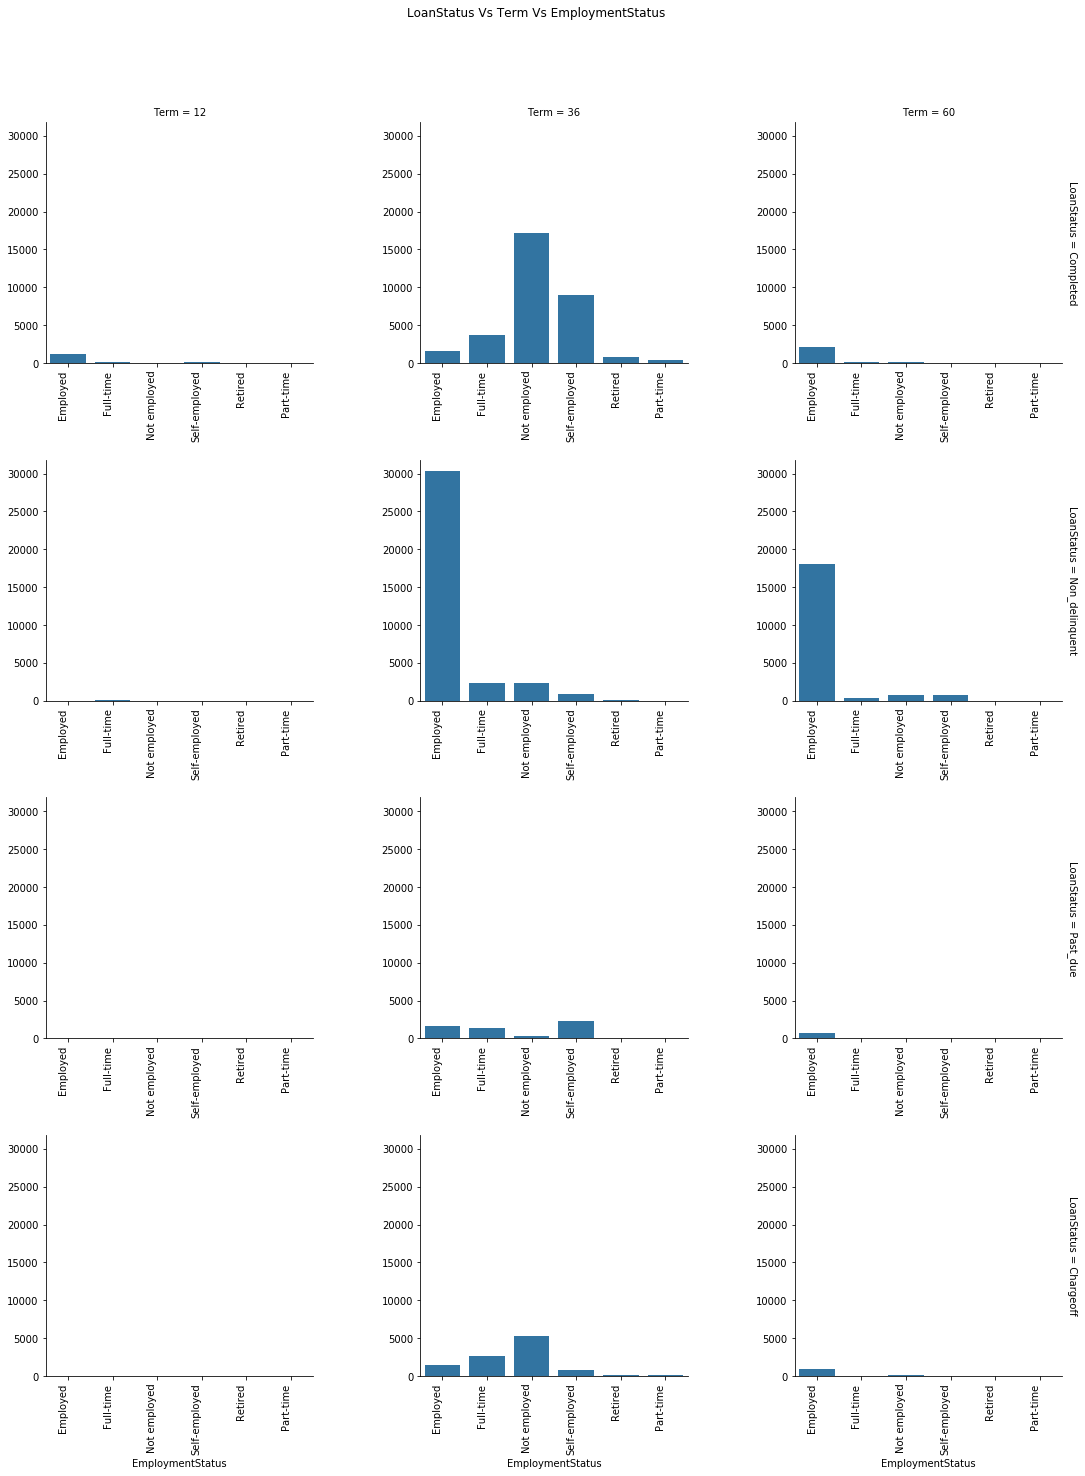

In [19]:

g=sb.FacetGrid(data=df_clean, col='Term', row= 'LoanStatus', size=5, margin_titles = True)
g.map(sb.countplot, 'EmploymentStatus');
g.fig.subplots_adjust(top=0.9);
g.fig.suptitle('LoanStatus Vs Term Vs EmploymentStatus');
g.set_xticklabels(rotation=30);
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for axes in g.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), 
                         rotation=90, 
                         horizontalalignment='right')

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [20]:
!jupyter nbconvert 'Project_Prosper_Part II.ipynb' --to slides --post serve --no-input --no-prompt